In [1]:
from sklearn.datasets import fetch_covtype
import pandas as pd
from sklearn.cluster import KMeans


In [2]:
forest = fetch_covtype()
forest_data = pd.DataFrame(forest['data'], columns = forest['feature_names'])
forest_data = forest_data.iloc[:, :-40]
#forest_data = forest_data[['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']]
#forest_data = forest_data[['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']]
forest_dict = forest_data.to_dict('records')

In [3]:
forest_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,0.0,0.0,1.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,0.0,0.0,1.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,0.0,0.0,1.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,0.0,0.0,1.0,0.0


In [4]:
forest_cluster = KMeans(n_clusters=7)
forest_cluster.fit(forest_data)

KMeans(n_clusters=7)

In [5]:
# count = 0 
# for i in forest_dict:
#     print(forest_dict[count])
#     count = count + 1

In [6]:
forest_labels = forest_cluster.predict(forest_data)
forest_cluster_df = pd.DataFrame(forest_labels, index=forest_data.index, columns = ['cluster'])
forest_cluster_df['cluster'].value_counts()

5    159577
0    122580
1     99833
3     71490
4     62608
2     38037
6     26887
Name: cluster, dtype: int64

In [7]:
for cluster,tree in forest_cluster_df.groupby("cluster"):
    print("Cluster:", cluster, "Size:", tree.shape[0])
    for tree in tree.sample(3).index:
        print(forest_dict[tree])

Cluster: 0 Size: 122580
{'Elevation': 2665.0, 'Aspect': 45.0, 'Slope': 27.0, 'Horizontal_Distance_To_Hydrology': 335.0, 'Vertical_Distance_To_Hydrology': 9.0, 'Horizontal_Distance_To_Roadways': 1860.0, 'Hillshade_9am': 215.0, 'Hillshade_Noon': 170.0, 'Hillshade_3pm': 73.0, 'Horizontal_Distance_To_Fire_Points': 2195.0, 'Wilderness_Area_0': 0.0, 'Wilderness_Area_1': 0.0, 'Wilderness_Area_2': 1.0, 'Wilderness_Area_3': 0.0}
{'Elevation': 3109.0, 'Aspect': 82.0, 'Slope': 15.0, 'Horizontal_Distance_To_Hydrology': 150.0, 'Vertical_Distance_To_Hydrology': 25.0, 'Horizontal_Distance_To_Roadways': 1851.0, 'Hillshade_9am': 239.0, 'Hillshade_Noon': 213.0, 'Hillshade_3pm': 100.0, 'Horizontal_Distance_To_Fire_Points': 2784.0, 'Wilderness_Area_0': 1.0, 'Wilderness_Area_1': 0.0, 'Wilderness_Area_2': 0.0, 'Wilderness_Area_3': 0.0}
{'Elevation': 3011.0, 'Aspect': 309.0, 'Slope': 9.0, 'Horizontal_Distance_To_Hydrology': 661.0, 'Vertical_Distance_To_Hydrology': -57.0, 'Horizontal_Distance_To_Roadways': 16

In [12]:
from sklearn.cluster import KMeans
#from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD 

In [13]:
matrix_dense = forest_data.to_numpy()
svd = TruncatedSVD(n_components=2)
svd.fit(matrix_dense)
matrix_reduced = svd.transform(matrix_dense)

In [14]:
inertia_scores = []
for i in range(1, 40, 1):
    tmp_model = KMeans(n_clusters=i)
    tmp_model.fit(matrix_reduced)
    score = tmp_model.inertia_
    inertia_scores.append((i, score))
inertia_scores

[(1, 1868393622293.8872),
 (2, 899821569170.2208),
 (3, 685199032127.7318),
 (4, 503090432045.332),
 (5, 380638828660.27026),
 (6, 331204037135.2667),
 (7, 288334190199.9964),
 (8, 253745857634.55508),
 (9, 231427923099.6287),
 (10, 203613704341.93726),
 (11, 187201080817.41248),
 (12, 170290241813.4348),
 (13, 158312133269.63416),
 (14, 149935048677.84723),
 (15, 134968077995.79987),
 (16, 129937936180.38501),
 (17, 120857625103.40495),
 (18, 115458769039.83517),
 (19, 106175301194.04102),
 (20, 100968047254.15059),
 (21, 97388508508.98737),
 (22, 91572972198.47345),
 (23, 87999665381.99557),
 (24, 85207331862.76997),
 (25, 80680460204.28539),
 (26, 77761280171.058),
 (27, 75488018523.0859),
 (28, 72801243138.5391),
 (29, 70929004372.55534),
 (30, 68348986949.89576),
 (31, 65850816892.005455),
 (32, 64535835603.56767),
 (33, 62614879795.32571),
 (34, 60653822318.37988),
 (35, 58498057461.24212),
 (36, 57084882604.66716),
 (37, 55918272663.20897),
 (38, 54126332130.82174),
 (39, 526954

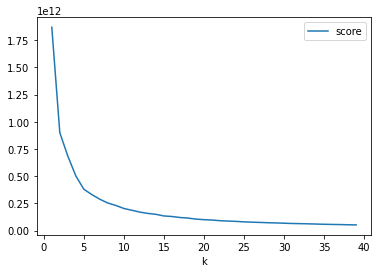

In [15]:
inertia_df = pd.DataFrame(inertia_scores, columns = ["k", "score"])
inertia_df.plot("k", "score")
plt.show()